In [49]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

import numpy as np
from sklearn.manifold import TSNE

from esn_lib.esn import *
from esn_lib.hubesn import *
from esn_tasks.mackey_glass.mackey import *
from esn_tasks.narma10.narma10 import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
params = {
    'lr': 0.5,
    'p2': 0.2,
    'r_sig': 0.1,
    'n_size': 500,
    'spec_rad': 0.9,
    'in_features': 1,
    'in_scale': 1,
    'activation': 'tanh',
    'input_neurons': 'hub',
    'hub_type': 'mix',
    'use_skip': False,
    'verbose': False,
    'lambda_dc': 0.5,
    'lambda_sc': 0.5,
    'exp_coef': 2,
}

In [50]:
n_steps = 2000
n_sig = 50

task_pm = {
    'n_train': 2000,
    'n_test': 1000,
}
mg = NARMA10(**task_pm)

In [51]:
hubesn = HubESN(**params)
states = hubesn.run(mg.X_train)[-200:]

deg = hubesn.get_degrees()

/var/folders/_d/88d1d3ys2hl147ppnscwxvk40000gn/T/ipykernel_29456/1718133251.py:8: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


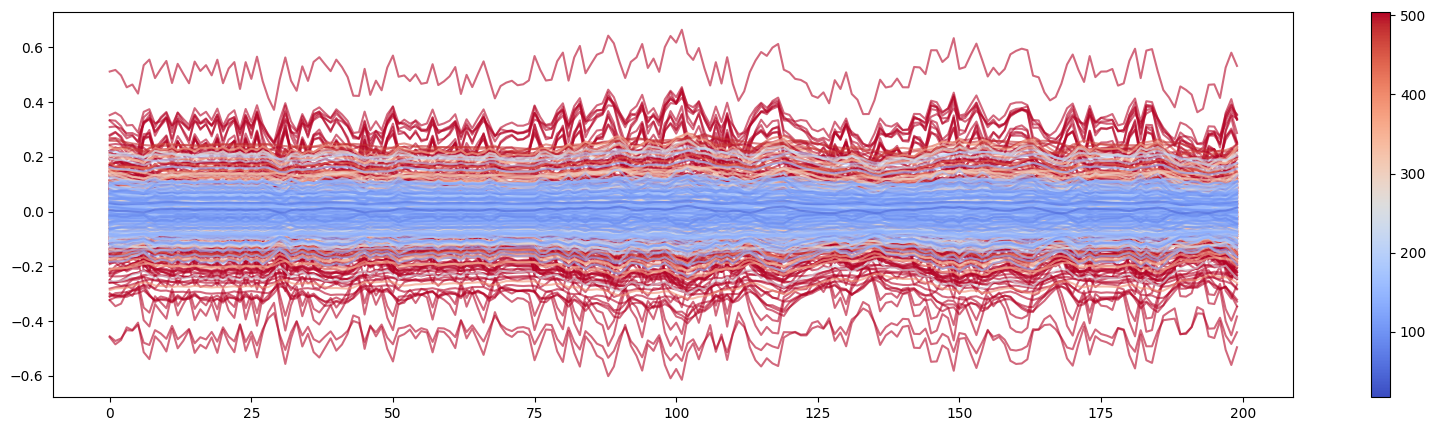

In [52]:
cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in deg]
plt.figure(figsize=(20, 5))
for i in range(deg.shape[0]):
    plt.plot(states[:, i], color=colors[i], alpha=0.6)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=deg.min(), vmax=deg.max()))
sm.set_array([])
plt.colorbar(sm)
plt.show()

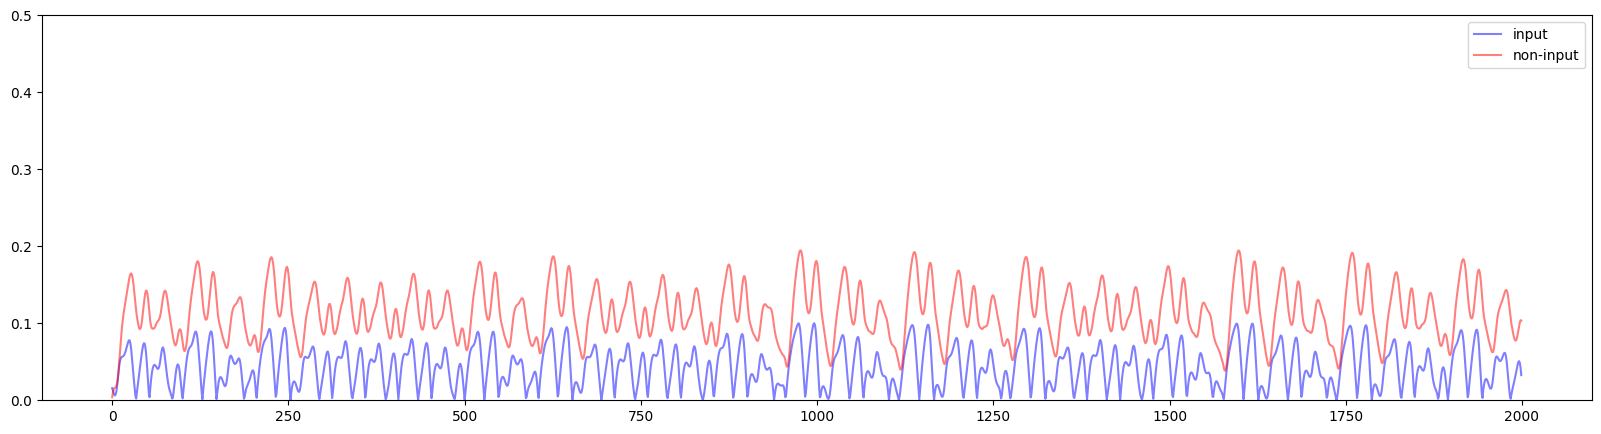

In [295]:
in_states = states[:, hubesn.in_idx].mean(axis=1)
in_states = np.abs(mg.X_train.flatten())/10
out_states = states[:, hubesn.out_idx].mean(axis=1)
in_diff = in_states[1:] - in_states[:-1]
in_cross = np.where(np.diff(np.sign(in_diff)))[0] + 1
out_diff = out_states[1:] - out_states[:-1]
out_cross = np.where(np.diff(np.sign(out_diff)))[0] + 1
plt.figure(figsize=(20, 5))
plt.plot(in_states, color='blue', alpha=0.5, label='input')
# for xc in in_cross:
#     plt.axvline(x=xc, color='blue', alpha=0.5)
# for xc in out_cross:
#     plt.axvline(x=xc, color='red', alpha=0.5)
plt.plot(out_states, color='red', alpha=0.5, label='non-input')
plt.ylim([0, 0.5])
plt.legend()
plt.show()

In [289]:
in_cross_filtered = []
for i in out_cross:
    in_cross_filtered.append(in_cross[np.where(in_cross <= i)[0][-1]])
in_cross_filtered = np.array(in_cross_filtered)

diff = in_cross_filtered - out_cross
print('mean diff: ', np.mean(diff))
print('missed peaks: ', in_cross.shape[0] - out_cross.shape[0])

mean diff:  -2.7206703910614527
missed peaks:  47


In [290]:
esn = ESN(**params)
states = np.abs(esn.run(current))

deg = esn.get_degrees()
deg = 1 - (deg - np.min(deg)) / (np.max(deg) - np.min(deg))

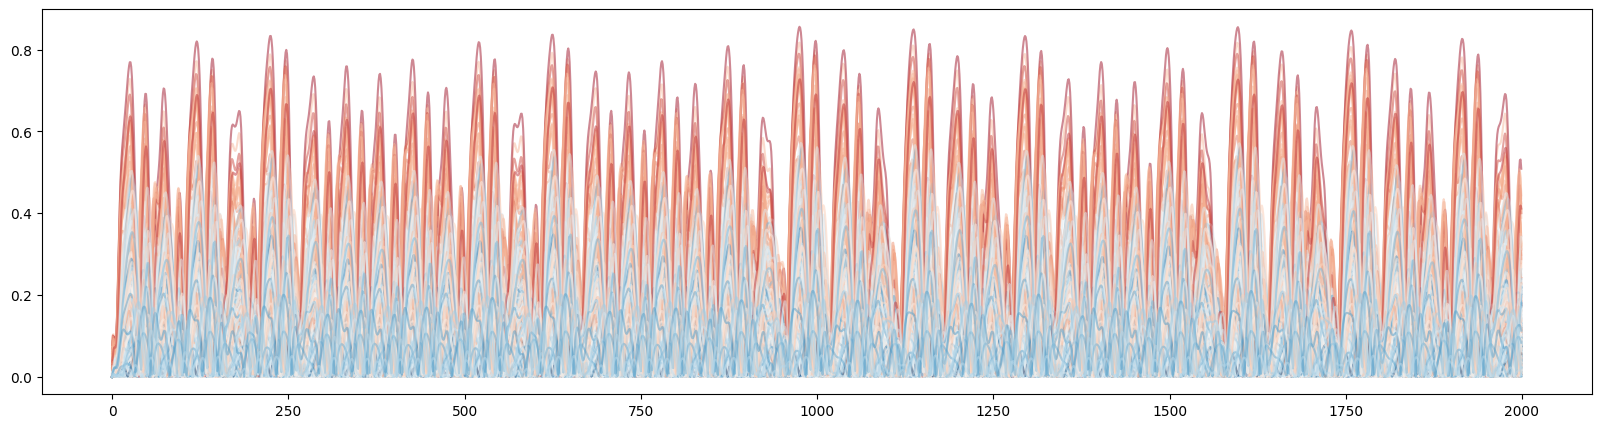

In [291]:
cmap = plt.get_cmap('RdBu')
colors = [cmap(i) for i in deg]
plt.figure(figsize=(20, 5))
for i in range(deg.shape[0]):
    plt.plot(states[:, i], color=colors[i], alpha=0.5)
plt.show()

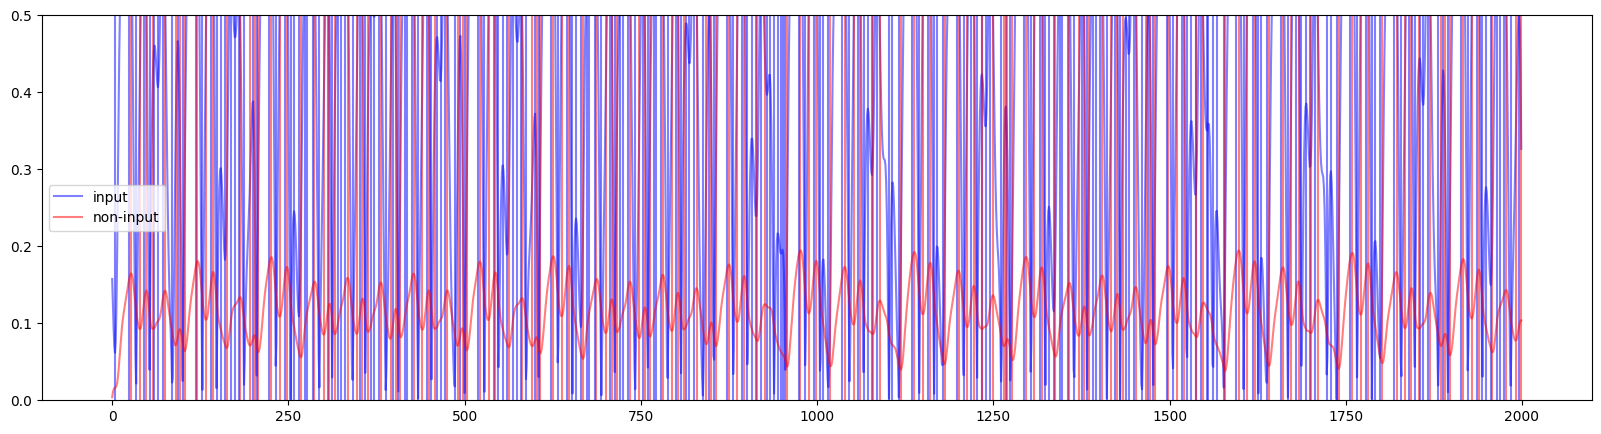

In [292]:
in_states = states[:, esn.in_idx].mean(axis=1)
in_states = np.abs(mg.X_train.flatten())
out_states = states[:, esn.out_idx].mean(axis=1)
in_diff = in_states[1:] - in_states[:-1]
in_cross = np.where(np.diff(np.sign(in_diff)))[0] + 1
out_diff = out_states[1:] - out_states[:-1]
out_cross = np.where(np.diff(np.sign(out_diff)))[0] + 1
plt.figure(figsize=(20, 5))
plt.plot(in_states, color='blue', alpha=0.5, label='input')
for xc in in_cross:
    plt.axvline(x=xc, color='blue', alpha=0.5)
for xc in out_cross:
    plt.axvline(x=xc, color='red', alpha=0.5)
plt.plot(out_states, color='red', alpha=0.5, label='non-input')
plt.ylim([0, 0.5])
plt.legend()
plt.show()

In [293]:
in_cross_filtered = []
for i in out_cross:
    in_cross_filtered.append(in_cross[np.where(in_cross <= i)[0][-1]])
in_cross_filtered = np.array(in_cross_filtered)

diff = in_cross_filtered - out_cross
print('mean diff: ', np.mean(diff))
print('missed peaks: ', in_cross.shape[0] - out_cross.shape[0])

mean diff:  -3.5238095238095237
missed peaks:  79
